SVD

In [79]:
import numpy as np
from scipy.linalg import svd

In [80]:
X = np.array([[3, 3, 2], [2, 3, -2]])
print("Original Matrix X:\n", X)

Original Matrix X:
 [[ 3  3  2]
 [ 2  3 -2]]


In [81]:

U, singular, V_transpose = svd(X)

In [82]:
U

array([[-0.7815437, -0.6238505],
       [-0.6238505,  0.7815437]])

In [83]:
V_transpose

array([[-0.64749817, -0.7599438 , -0.05684667],
       [-0.10759258,  0.16501062, -0.9804057 ],
       [-0.75443354,  0.62869461,  0.18860838]])

In [84]:
singular

array([5.54801894, 2.86696457])

In [85]:
singular_inv = 1.0 / singular
s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]
M = np.dot(np.dot(V_transpose.T, s_inv.T), U.T)
print("Reconstructed Matrix M:\n", M)

Reconstructed Matrix M:
 [[ 0.11462451  0.04347826]
 [ 0.07114625  0.13043478]
 [ 0.22134387 -0.26086957]]


IMAGE PROCESSING USING SVD

In [86]:
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt

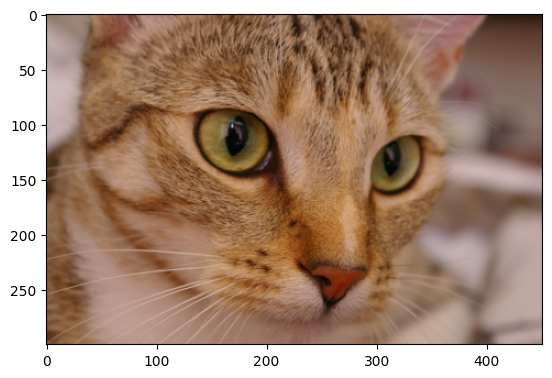

In [87]:
cat = data.chelsea()
plt.imshow(cat)

In [88]:
gray_cat = rgb2gray(cat)

In [89]:
U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)

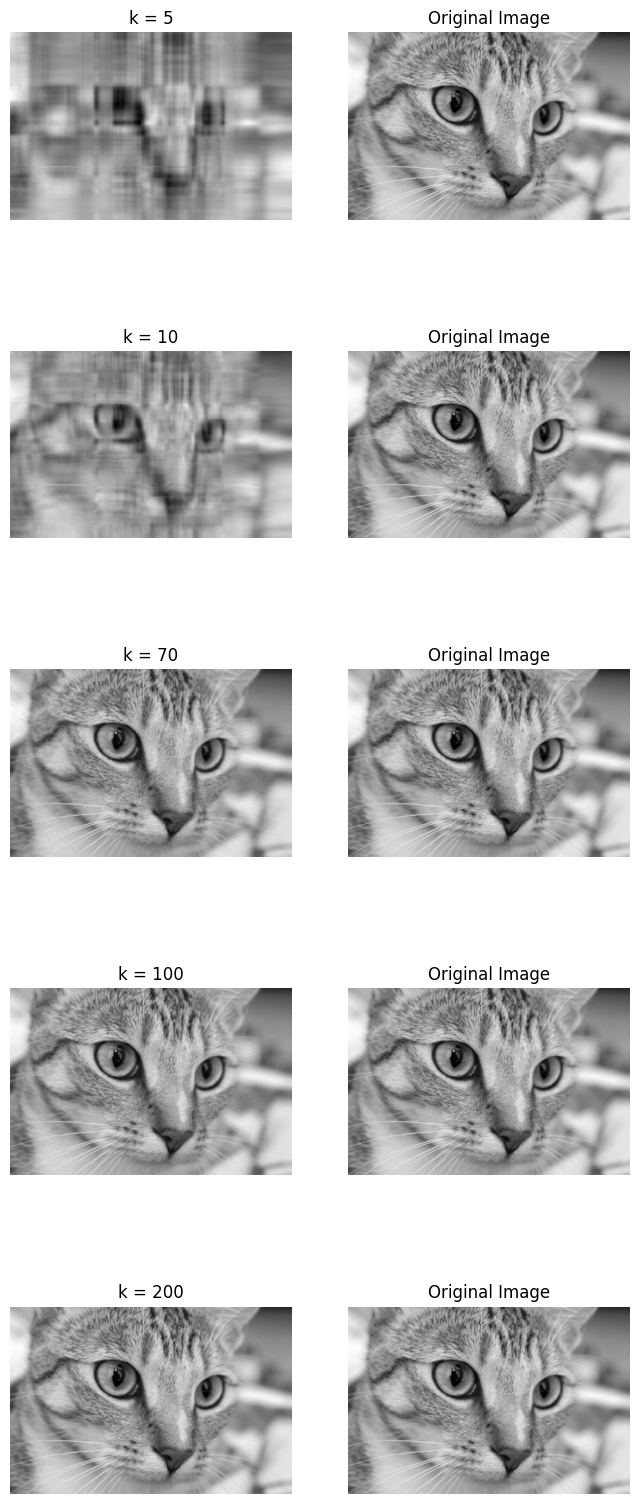

In [90]:
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = " + str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1

plt.show()